# Exercises 

Chapter 3<br>
Classification
***
<br>
Importing some useful libraries/codes

In [1]:
import matplotlib.pyplot as plt

### Questions
1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
on the test set. <br>
Hint: the KNeighborsClassifier works quite well for this task;
you just need to find good hyperparameter values (try a grid search on the
weights and n_neighbors hyperparameters).<br>

2. Write a function that can shift an MNIST image in any direction (left, right, up,
or down) by one pixel.6
Then, for each image in the training set, create four
shifted copies (one per direction) and add them to the training set. Finally, train
your best model on this expanded training set and measure its accuracy on the
test set. You should observe that your model performs even better now! This
technique of artificially growing the training set is called data augmentation or
training set expansion.<br>

3. Tackle the Titanic dataset. A great place to start is on Kaggle. Alternatively, you
can download the data from https://homl.info/titanic.tgz and unzip this tarball
like you did for the housing data in Chapter 2. This will give you two CSV files,
train.csv and test.csv, which you can load using pandas.read_csv(). The goal
is to train a classifier that can predict the Survived column based on the other
columns.<br><br>


4. Build a spam classifier (a more challenging exercise):
    - a. Download examples of spam and ham from Apache SpamAssassin’s public datasets.
    - b. Unzip the datasets and familiarize yourself with the data format.
    - c. Split the data into a training set and a test set.
    - d. Write a data preparation pipeline to convert each email into a feature vector.
        Your preparation pipeline should transform an email into a (sparse) vector
        that indicates the presence or absence of each possible word. For example, if
        all emails only ever contain four words, “Hello”, “how”, “are”, “you”, then the
        email “Hello you Hello Hello you” would be converted into a vector [1, 0,
        0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is
        present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of
        each word.
        You may want to add hyperparameters to your preparation pipeline to control
        whether or not to strip off email headers, convert each email to lowercase,
        remove punctuation, replace all URLs with “URL”, replace all numbers with
        “NUMBER”, or even perform stemming (i.e., trim off word endings; there are
        Python libraries available to do this).
    - e. Finally, try out several classifiers and see if you can build a great spam classi‐
    fier, with both high recall and high precision.


***
<br><br>
### Question 1

Importing MNIST data

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

Model Building and Training 

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

0.9712857142857143


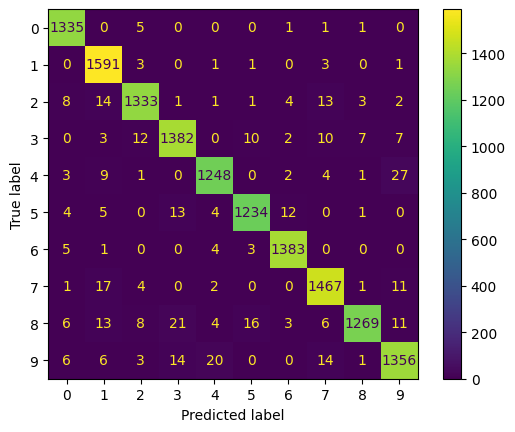

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
print(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()